<a href="https://colab.research.google.com/github/joew2k/finance_data/blob/main/KURTOSIS_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kurtosis, skewnorm, norm
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

## Kurtosis
### **Definition**

Kurtosis is a measure of describing how heavy the tails of a distribution deviate from the tails of a Gaussian distribution. For sample statistics, the kurtosis can be estimated as follows


$K = \frac{\left(\sum_{i=1}^n (x_i - \bar{x})^4\right)/n}{s^4} - 3$

Where
${\left(\sum_{i=1}^n (x_i - \bar{x})^4\right)/n}$ is the fourth moment

and ${s}$ is the sample standard deviation

From the above, If the kurtosis is positive, it indicates heavy tails, and a negative value indicates that there are light tails. Comparing the shape of the tail with the normal distribution suggests if the distribution is a heavy tail or a light tail. The kurtosis of a standard normal distribution is 3.0.
Basically, there are three categories of Kurtosis.
1.	Mesokurtic which is like the bell curve of a normal distribution.
2.	Leptokurtic distribution if the Kurtosis is greater than the mesokurtic distribution.
3.	Platykurtic distribution which is less than the mesokurtic distribution.

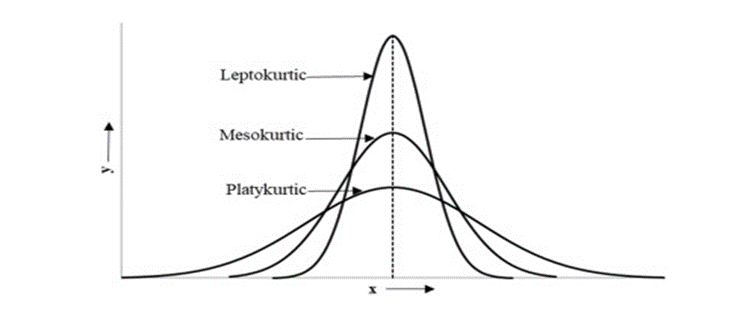

### **Description**


Measures of Kurtosis help identify if a curve is normal or abnormally shaped (Megan, 2013). Datasets with high levels of Kurtosis usually have unique peaks near the mean, decline rapidly, and have heavy tails. On the other hand, datasets with low Kurtosis usually have a flat top near the mean instead of a sharp peak.

The primary factor that determines the peakiness of the distribution is the level of degree of freedom, distributions can have the same mean, standard deviations, and the same degree of skewness. Skewness and Kurtosis can help identify the presence of outliers in datasets. If the empirical distribution has a high amount of kurtosis that might be a clue that we should look and see if that is driven by one or more outliers (Chris 2022)

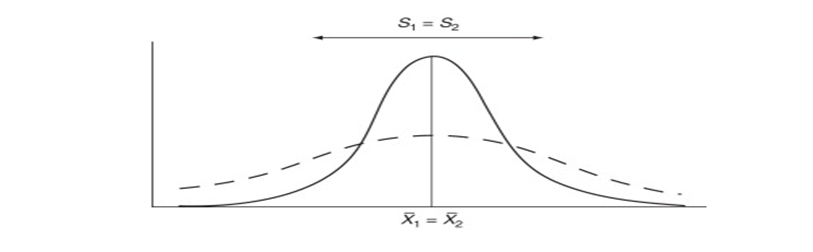

### **Demonstration**:

For demonstration purposes, we will use the META( formerly Facebook) daily returns data to show the presence of kurtosis). Determining Kurtosis can simply be derived using the descriptive statistics of the **stats** library, which returns the excess kurtosis. To get the real Kurtosis we have to add three to the derived Kurtosis


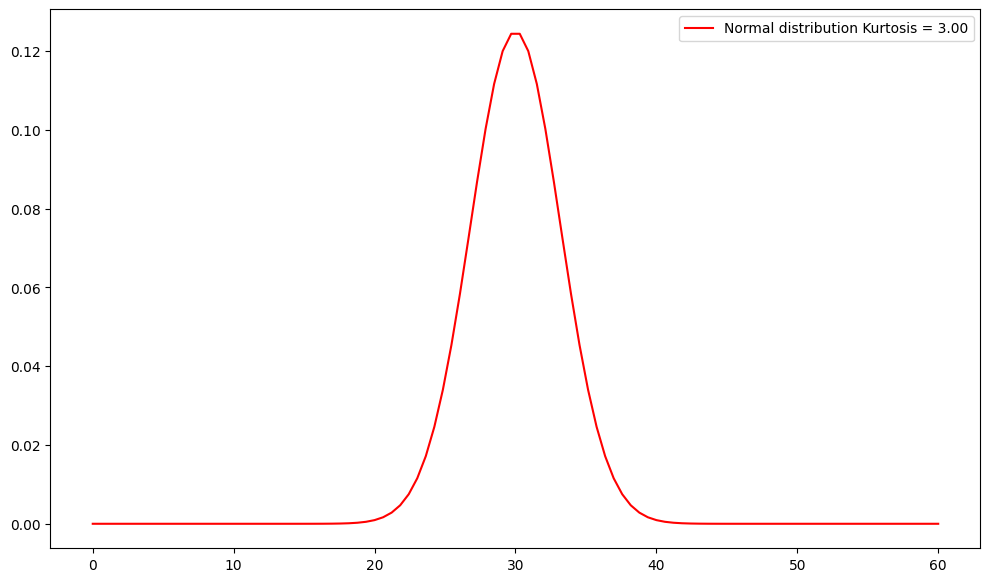

In [ ]:
# Normal distribution using normal randomly generated data
x = np.linspace(0, 60, 100)
y = stats.norm.pdf(x, loc = 30, scale = 3.194 )
plt.figure(figsize=(12,7))
plt.plot(x, y, c='r', label='Normal distribution Kurtosis = {:.2f}'.format(kurtosis(y)))
plt.legend()
plt.show();

In [8]:
# Download TSLA data from Yahoo
start_date = '2018-01-01'
end_date = '2023-12-31'
TSLA_close = pdr.get_data_yahoo('TSLA', start=start_date, end=end_date)['Adj Close']
TSLA_return = round(np.log(TSLA_close).diff() * 100, 2)
TSLA_return.dropna(inplace=True)


[*********************100%%**********************]  1 of 1 completed


In [15]:
n, minmax, mean, var, skew, kurt = stats.describe(TSLA_return)
mini, maxi = minmax
std = var ** .5
print("TSLA Excess Kurtosis {:.2f}".format(kurt))

TSLA Excess Kurtosis 3.56


### **Diagram**

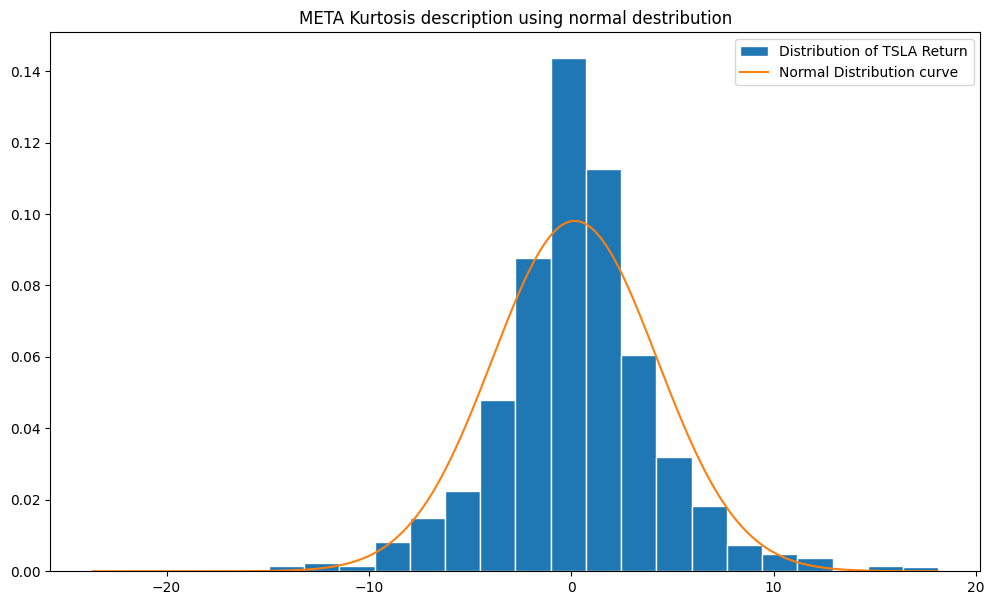

In [29]:
plt.figure(figsize=(12,7))
plt.hist(TSLA_return, bins = 24, edgecolor='w', density=True, label="Distribution of TSLA Return")
overlay = np.linspace(mini, maxi, n)
plt.plot(overlay, norm.pdf(overlay, mean, std), label="Normal Distribution curve")
plt.title("META Kurtosis description using normal destribution")
plt.legend()
plt.show();


### **Diagnosis:**
There are several tests used to recognize kurtosis is a sample, A simple method is using the **stats.kurtosistest** in python **stats** library. if the *p* value is less than $0.05$ The data is not normal distributed, we will also compare the value of the excess kurtosis with the normal kurtosis of $3.0$ to know if the distribution is Leptokurtic, Mesokurtic or Platykurtic

From the code below, it can be observed that the *p* value is less than 0.05 which indicates that our distribution for TSLA is not normerlly distributed


In [28]:
x = norm.rvs(mean, std, n)
x_test = stats.kurtosistest(x)
TSLA_test = stats.kurtosistest(TSLA_return)
print(f'{"    Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[0]:16.4f}")
print(f"META:{TSLA_test[0]:>17.2f}{TSLA_test[1]:16.4f}")


    Test statistic          p-value
     ------------------------------
x:             0.45          0.4491
META:            11.11          0.0000


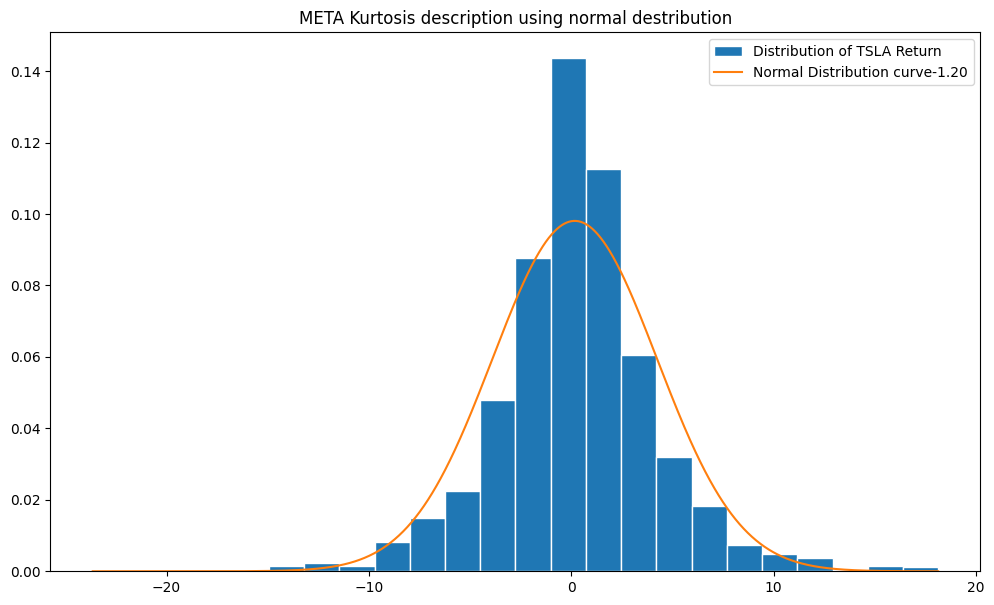

In [24]:
plt.figure(figsize=(12,7))
plt.hist(TSLA_return, bins = 24, edgecolor='w', density=True, label="Distribution of TSLA Return")
overlay = np.linspace(mini, maxi, n)
plt.plot(overlay, norm.pdf(overlay, mean, std), label="Normal Distribution curve")
plt.title("META Kurtosis description using normal destribution")
plt.legend()
plt.show();


### **Damage**
Kurtosis can cause problems when modeling time series. Kurtosis can lead to inaccurate forecasts. Inaccurate forecasts can lead to losses for the business.
For example, if we forecast that the price of an asset will go up, but the actual price goes down, the business will lose money.


### **Direction**

To address the challenges with Kurtosuis in modeling our data, we can use different models that account for these features, We can use models that allow for non-normal distributions such as t-distributions, skewed directions or mixture distributions.

### Reference

- Megan M. Griffin, Trisha D. Steinbrecher, in [International Review of Research in Developmental Disabilities](https://www.sciencedirect.com/bookseries/international-review-of-research-in-developmental-disabilities), 2013
-
Chris Kelliher. Quantitative Finance with Python : A Practical Guide to Investment Management, Trading, and Financial Engineering. 2022.
- Y. Guney, G. Komba, [in Handbook of Frontier Markets](https://www.sciencedirect.com/book/9780128037768/handbook-of-frontier-markets), 2016
